In [2]:
!pip install pymongo

     |████████████████████████████████| 506 kB 28.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 23.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install tweepy

     |████████████████████████████████| 63 kB 203 kB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 20.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install twitter

     |████████████████████████████████| 50 kB 1.2 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [8]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Know second and third lines for quiz

In [9]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [10]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [11]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [12]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 03 20:23:22 +0000 2021'
'Wed Nov 03 20:23:22 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:21 +0000 2021'
'Wed Nov 03 20:23:19 +0000 2021'
'Wed Nov 03 20:23:19 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:18 +0000 2021'
'Wed Nov 03 20:23:17 +0000 2021'
'Wed Nov 03 20:23:17 +0000 2021'
'Wed Nov 03 20:23:17 +0000 2021'
'Wed Nov 03 20:23:16 +0000 2021'
'Wed Nov 03 20:23:16 +0000 2021'
'Wed Nov 03 20:23:15 +0000 2021'
'Wed Nov 03 20:23:15 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:14 +0000 2021'
'Wed Nov 03 20:23:13 +0000 2021'
'Wed Nov 03 20:23:12 +0000 2021'
'Wed Nov 03 20:23:12 +0000 2021'
'Wed Nov 03 20:23:12 +0000 2021'
'Wed Nov 03 20:23:12 +0000 2021'
'Wed Nov 0

In [13]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 03 20:22:36 +0000 2021'
'Wed Nov 03 20:22:35 +0000 2021'
'Wed Nov 03 20:22:35 +0000 2021'
'Wed Nov 03 20:22:35 +0000 2021'
'Wed Nov 03 20:22:35 +0000 2021'
'Wed Nov 03 20:22:34 +0000 2021'
'Wed Nov 03 20:22:34 +0000 2021'
'Wed Nov 03 20:22:34 +0000 2021'
'Wed Nov 03 20:22:33 +0000 2021'
'Wed Nov 03 20:22:33 +0000 2021'
'Wed Nov 03 20:22:32 +0000 2021'
'Wed Nov 03 20:22:32 +0000 2021'
'Wed Nov 03 20:22:31 +0000 2021'
'Wed Nov 03 20:22:30 +0000 2021'
'Wed Nov 03 20:22:30 +0000 2021'
'Wed Nov 03 20:22:29 +0000 2021'
'Wed Nov 03 20:22:29 +0000 2021'
'Wed Nov 03 20:22:28 +0000 2021'
'Wed Nov 03 20:22:28 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:26 +0000 2021'
'Wed Nov 03 20:22:25 +0000 2021'
'Wed Nov 03 20:22:25 +0000 2021'
'Wed Nov 03 20:22:25 +0000 2021'
'Wed Nov 03 20:22:24 +0000 2021'
'Wed Nov 03 20:22:23 +0000 2021'
'Wed Nov 03 20:22:22 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:20:39 +0000 2021'
'Wed Nov 03 20:20:39 +0000 2021'
'Wed Nov 03 20:20:39 +0000 2021'
'Wed Nov 03 20:20:39 +0000 2021'
'Wed Nov 03 20:20:39 +0000 2021'
'Wed Nov 03 20:20:36 +0000 2021'
'Wed Nov 03 20:20:35 +0000 2021'
'Wed Nov 03 20:20:34 +0000 2021'
'Wed Nov 03 20:20:34 +0000 2021'
'Wed Nov 03 20:20:33 +0000 2021'
'Wed Nov 03 20:20:32 +0000 2021'
'Wed Nov 03 20:20:32 +0000 2021'
'Wed Nov 03 20:20:30 +0000 2021'
'Wed Nov 03 20:20:30 +0000 2021'
'Wed Nov 03 20:20:29 +0000 2021'
'Wed Nov 03 20:20:29 +0000 2021'
'Wed Nov 03 20:20:29 +0000 2021'
'Wed Nov 03 20:20:28 +0000 2021'
'Wed Nov 03 20:20:28 +0000 2021'
'Wed Nov 03 20:20:28 +0000 2021'
'Wed Nov 03 20:20:26 +0000 2021'
'Wed Nov 03 20:20:25 +0000 2021'
'Wed Nov 03 20:20:25 +0000 2021'
'Wed Nov 03 20:20:24 +0000 2021'
'Wed Nov 03 20:20:24 +0000 2021'
'Wed Nov 03 20:20:23 +0000 2021'
'Wed Nov 03 20:20:23 +0000 2021'
'Wed Nov 03 20:20:22 +0000 2021'
'Wed Nov 03 20:20:21 +0000 2021'
'Wed Nov 03 20:20:21 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:18:38 +0000 2021'
'Wed Nov 03 20:18:37 +0000 2021'
'Wed Nov 03 20:18:37 +0000 2021'
'Wed Nov 03 20:18:37 +0000 2021'
'Wed Nov 03 20:18:36 +0000 2021'
'Wed Nov 03 20:18:35 +0000 2021'
'Wed Nov 03 20:18:35 +0000 2021'
'Wed Nov 03 20:18:35 +0000 2021'
'Wed Nov 03 20:18:34 +0000 2021'
'Wed Nov 03 20:18:33 +0000 2021'
'Wed Nov 03 20:18:32 +0000 2021'
'Wed Nov 03 20:18:31 +0000 2021'
'Wed Nov 03 20:18:30 +0000 2021'
'Wed Nov 03 20:18:30 +0000 2021'
'Wed Nov 03 20:18:30 +0000 2021'
'Wed Nov 03 20:18:30 +0000 2021'
'Wed Nov 03 20:18:29 +0000 2021'
'Wed Nov 03 20:18:29 +0000 2021'
'Wed Nov 03 20:18:29 +0000 2021'
'Wed Nov 03 20:18:29 +0000 2021'
'Wed Nov 03 20:18:29 +0000 2021'
'Wed Nov 03 20:18:27 +0000 2021'
'Wed Nov 03 20:18:27 +0000 2021'
'Wed Nov 03 20:18:27 +0000 2021'
'Wed Nov 03 20:18:26 +0000 2021'
'Wed Nov 03 20:18:26 +0000 2021'
'Wed Nov 03 20:18:26 +0000 2021'
'Wed Nov 03 20:18:25 +0000 2021'
'Wed Nov 03 20:18:25 +0000 2021'
'Wed Nov 03 20:18:24 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:16:21 +0000 2021'
'Wed Nov 03 20:16:21 +0000 2021'
'Wed Nov 03 20:16:21 +0000 2021'
'Wed Nov 03 20:16:21 +0000 2021'
'Wed Nov 03 20:16:20 +0000 2021'
'Wed Nov 03 20:16:19 +0000 2021'
'Wed Nov 03 20:16:18 +0000 2021'
'Wed Nov 03 20:16:18 +0000 2021'
'Wed Nov 03 20:16:18 +0000 2021'
'Wed Nov 03 20:16:18 +0000 2021'
'Wed Nov 03 20:16:17 +0000 2021'
'Wed Nov 03 20:16:17 +0000 2021'
'Wed Nov 03 20:16:17 +0000 2021'
'Wed Nov 03 20:16:16 +0000 2021'
'Wed Nov 03 20:16:15 +0000 2021'
'Wed Nov 03 20:16:13 +0000 2021'
'Wed Nov 03 20:16:12 +0000 2021'
'Wed Nov 03 20:16:11 +0000 2021'
'Wed Nov 03 20:16:11 +0000 2021'
'Wed Nov 03 20:16:10 +0000 2021'
'Wed Nov 03 20:16:09 +0000 2021'
'Wed Nov 03 20:16:09 +0000 2021'
'Wed Nov 03 20:16:07 +0000 2021'
'Wed Nov 03 20:16:06 +0000 2021'
'Wed Nov 03 20:16:06 +0000 2021'
'Wed Nov 03 20:16:05 +0000 2021'
'Wed Nov 03 20:16:04 +0000 2021'
'Wed Nov 03 20:16:04 +0000 2021'
'Wed Nov 03 20:16:03 +0000 2021'
'Wed Nov 03 20:16:03 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:14:35 +0000 2021'
'Wed Nov 03 20:14:35 +0000 2021'
'Wed Nov 03 20:14:34 +0000 2021'
'Wed Nov 03 20:14:34 +0000 2021'
'Wed Nov 03 20:14:34 +0000 2021'
'Wed Nov 03 20:14:33 +0000 2021'
'Wed Nov 03 20:14:32 +0000 2021'
'Wed Nov 03 20:14:32 +0000 2021'
'Wed Nov 03 20:14:32 +0000 2021'
'Wed Nov 03 20:14:30 +0000 2021'
'Wed Nov 03 20:14:29 +0000 2021'
'Wed Nov 03 20:14:29 +0000 2021'
'Wed Nov 03 20:14:28 +0000 2021'
'Wed Nov 03 20:14:28 +0000 2021'
'Wed Nov 03 20:14:27 +0000 2021'
'Wed Nov 03 20:14:26 +0000 2021'
'Wed Nov 03 20:14:25 +0000 2021'
'Wed Nov 03 20:14:25 +0000 2021'
'Wed Nov 03 20:14:25 +0000 2021'
'Wed Nov 03 20:14:24 +0000 2021'
'Wed Nov 03 20:14:24 +0000 2021'
'Wed Nov 03 20:14:24 +0000 2021'
'Wed Nov 03 20:14:24 +0000 2021'
'Wed Nov 03 20:14:24 +0000 2021'
'Wed Nov 03 20:14:23 +0000 2021'
'Wed Nov 03 20:14:23 +0000 2021'
'Wed Nov 03 20:14:23 +0000 2021'
'Wed Nov 03 20:14:23 +0000 2021'
'Wed Nov 03 20:14:21 +0000 2021'
'Wed Nov 03 20:14:19 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:12:10 +0000 2021'
'Wed Nov 03 20:12:09 +0000 2021'
'Wed Nov 03 20:12:09 +0000 2021'
'Wed Nov 03 20:12:09 +0000 2021'
'Wed Nov 03 20:12:08 +0000 2021'
'Wed Nov 03 20:12:08 +0000 2021'
'Wed Nov 03 20:12:07 +0000 2021'
'Wed Nov 03 20:12:06 +0000 2021'
'Wed Nov 03 20:12:05 +0000 2021'
'Wed Nov 03 20:12:05 +0000 2021'
'Wed Nov 03 20:12:04 +0000 2021'
'Wed Nov 03 20:12:04 +0000 2021'
'Wed Nov 03 20:12:04 +0000 2021'
'Wed Nov 03 20:12:04 +0000 2021'
'Wed Nov 03 20:12:03 +0000 2021'
'Wed Nov 03 20:12:02 +0000 2021'
'Wed Nov 03 20:12:01 +0000 2021'
'Wed Nov 03 20:12:01 +0000 2021'
'Wed Nov 03 20:12:01 +0000 2021'
'Wed Nov 03 20:12:00 +0000 2021'
'Wed Nov 03 20:12:00 +0000 2021'
'Wed Nov 03 20:12:00 +0000 2021'
'Wed Nov 03 20:11:59 +0000 2021'
'Wed Nov 03 20:11:59 +0000 2021'
'Wed Nov 03 20:11:59 +0000 2021'
'Wed Nov 03 20:11:58 +0000 2021'
'Wed Nov 03 20:11:58 +0000 2021'
'Wed Nov 03 20:11:57 +0000 2021'
'Wed Nov 03 20:11:57 +0000 2021'
'Wed Nov 03 20:11:57 +0000 2021'
'Wed Nov 0

KeyboardInterrupt: 

In [14]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

1486
1359


In [15]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [43]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "death"}}) # return tweets contain vote

In [44]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: problembear
text: 16 more Montana covid19 deaths reported today… https://t.co/nqIeCKebRi
----
name: Dr.Ramneesh Trehan MBBS MD
text: #covid19 deaths in USA 🇺🇸 1509 on November 2, 2021 https://t.co/QEzwCVemLm
----
name: Yahia Habib Helifa
text: RT @EduEngineer: Globally, there is a 52.3% increase in #COVID19 deaths per day associated with the start of a #COVIDvaccination program as…
----
name: 🇯🇵A. N. M.🇯🇵🍇🍠🫕🥧🍂🍁⚾
text: RT @EduEngineer: Globally, there is a 52.3% increase in #COVID19 deaths per day associated with the start of a #COVIDvaccination program as…
----
name: Global Saskatoon
text: #COVID19: Active cases down to 1,765 as #Sask adds 3 new deaths https://t.co/85DmmAKO1Q
----
name: Global Regina
text: #COVID19: Active cases down to 1,765 as #Sask adds 3 new deaths https://t.co/MxIWIRbIFt
----
name: Brandon Scales
text: RT @CancerDotNet: #COVID19 vaccines are safe for people with cancer and help protect against serious illness and death.

Check out this inf…
----
name: D

In [41]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "death"}}) # return tweets contain vote

In [42]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status
0,6182f0e753d3e4eef49ef23b,Wed Nov 03 20:20:57 +0000 2021,1455993421575819270,1455993421575819270,16 more Montana covid19 deaths reported today…...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1455993417645707266, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,None,None,False,0,0,False,False,False,en,NaN
1,6182f0f953d3e4eef49ef5e4,Wed Nov 03 20:13:19 +0000 2021,1455991502845456388,1455991502845456388,"#covid19 deaths in USA 🇺🇸 1509 on November 2, ...",False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'media': [{'id': 1455991492137390083, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,None,None,False,0,0,False,False,False,en,NaN
2,6182f0fa53d3e4eef49ef5f8,Wed Nov 03 20:13:07 +0000 2021,1455991450794143748,1455991450794143748,"RT @EduEngineer: Globally, there is a 52.3% in...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,None,None,False,424,0,False,False,NaN,en,{'created_at': 'Wed Nov 03 05:18:48 +0000 2021...
3,6182f0f453d3e4eef49ef4c6,Wed Nov 03 20:15:30 +0000 2021,1455992052026511360,1455992052026511360,"RT @EduEngineer: Globally, there is a 52.3% in...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,None,None,False,424,0,False,False,NaN,en,{'created_at': 'Wed Nov 03 05:18:48 +0000 2021...
4,6182f0f153d3e4eef49ef443,Wed Nov 03 20:16:35 +0000 2021,1455992321674256389,1455992321674256389,"#COVID19: Active cases down to 1,765 as #Sask ...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.socialflow.com"" rel=""nofol...",...,None,None,False,0,0,False,False,False,en,NaN
5,6182f0f153d3e4eef49ef436,Wed Nov 03 20:16:43 +0000 2021,1455992356663185427,1455992356663185427,"#COVID19: Active cases down to 1,765 as #Sask ...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.socialflow.com"" rel=""nofol...",...,None,None,False,0,0,False,False,False,en,NaN
6,6182f0ed53d3e4eef49ef368,Wed Nov 03 20:18:33 +0000 2021,1455992817755561990,1455992817755561990,RT @CancerDotNet: #COVID19 vaccines are safe f...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,None,None,False,46,0,False,False,NaN,en,{'created_at': 'Sat Oct 30 14:00:09 +0000 2021...
7,6182f0fd53d3e4eef49ef690,Wed Nov 03 20:11:45 +0000 2021,1455991108002009097,1455991108002009097,"Tracking the global coronavirus outbreak, upda...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,None,None,False,0,0,False,False,False,en,NaN
8,6182f0f053d3e4eef49ef405,Wed Nov 03 20:17:08 +0000 2021,1455992461092868105,1455992461092868105,344 new cases and 23 new deaths in South Afric...,False,"{'hashtags': [{'text': 'coronavirus', 'indices...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://parc.pro"" rel=""nofollow"">COVI...",...,None,None,False,0,0,False,False,NaN,en,NaN
9,6182f0ed53d3e4eef49ef383,Wed Nov 03 20:18:21 +0000 2021,1455992766220152835,1455992766220152835,"RT @TheDailyEdge: In the age of free vaccines,...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type':

<AxesSubplot:>

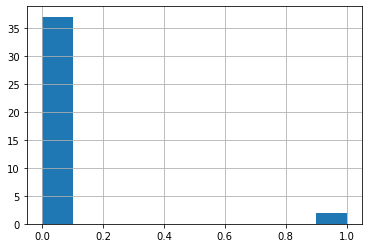

In [45]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count